# 1. Import Modules

In [99]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import os
import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, log_loss

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier 
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

# 2. Browse Data

In [2]:
os.chdir('C:\overdue_predict\data') 

In [3]:
os.listdir("C:\overdue_predict\data")

['sample_submission.csv', 'test.csv', 'train.csv']

In [4]:
train = pd.read_csv("train.csv", index_col=False)
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission.csv")

In [5]:
train.head(10)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0
5,5,F,N,Y,2,270000.0,Working,Secondary / secondary special,Married,House / apartment,-13413,-4996,1,0,0,1,High skill tech staff,4.0,-18.0,1.0
6,6,F,N,N,0,315000.0,Working,Secondary / secondary special,Separated,House / apartment,-17570,-1978,1,0,0,1,Core staff,1.0,-41.0,2.0
7,7,M,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-14896,-5420,1,0,0,1,Drivers,2.0,-53.0,0.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
9,9,F,N,Y,0,103500.0,Working,Secondary / secondary special,Married,House / apartment,-15785,-1308,1,0,0,0,Medicine staff,2.0,-5.0,2.0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

In [7]:
test.head(10)

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month
0,26457,M,Y,N,0,112500.0,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,NaN,2.0,-60.0
1,26458,F,N,Y,0,135000.0,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,Core staff,2.0,-36.0
2,26459,F,N,Y,0,69372.0,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,Laborers,2.0,-40.0
3,26460,M,Y,N,0,112500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,Drivers,2.0,-41.0
4,26461,F,Y,Y,0,225000.0,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,Managers,2.0,-8.0
5,26462,F,Y,Y,0,126000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-18458,-2104,1,0,0,0,Core staff,1.0,-5.0
6,26463,F,N,Y,0,585000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-18858,-2010,1,0,1,0,NaN,2.0,-1.0
7,26464,F,N,Y,0,141750.0,Pensioner,Higher education,Married,House / apartment,-20345,365243,1,0,1,0,NaN,2.0,-10.0
8,26465,F,N,N,0,225000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19316,-4451,1,1,1,0,NaN,1.0,-23.0
9,26466,M,N,N,0,130500.0,Working,Secondary / secondary special,Single / not married,With parents,-11873,-3504,1,0,0,0,Laborers,1.0,-31.0


In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          10000 non-null  int64  
 1   gender         10000 non-null  object 
 2   car            10000 non-null  object 
 3   reality        10000 non-null  object 
 4   child_num      10000 non-null  int64  
 5   income_total   10000 non-null  float64
 6   income_type    10000 non-null  object 
 7   edu_type       10000 non-null  object 
 8   family_type    10000 non-null  object 
 9   house_type     10000 non-null  object 
 10  DAYS_BIRTH     10000 non-null  int64  
 11  DAYS_EMPLOYED  10000 non-null  int64  
 12  FLAG_MOBIL     10000 non-null  int64  
 13  work_phone     10000 non-null  int64  
 14  phone          10000 non-null  int64  
 15  email          10000 non-null  int64  
 16  occyp_type     6848 non-null   object 
 17  family_size    10000 non-null  float64
 18  begin_m

In [9]:
sample_sub.head(10)

,index,0,1,2
0,26457,0,0,0
1,26458,0,0,0
2,26459,0,0,0
3,26460,0,0,0
4,26461,0,0,0
5,26462,0,0,0
6,26463,0,0,0
7,26464,0,0,0
8,26465,0,0,0
9,26466,0,0,0


In [10]:
sample_sub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   index   10000 non-null  int64
 1   0       10000 non-null  int64
 2   1       10000 non-null  int64
 3   2       10000 non-null  int64
dtypes: int64(4)
memory usage: 312.6 KB


In [11]:
print("family_type: ")
print(train["family_type"].value_counts())
print('---------------------------------')

print("income_type: ")
print(train["income_type"].value_counts())
print('---------------------------------')

print("edu_type: ")
print(train["edu_type"].value_counts())
print('---------------------------------')

family_type: 
Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64
---------------------------------
income_type: 
Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64
---------------------------------
edu_type: 
Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64
---------------------------------


# 3. EDA & Feature Engineering

### 3-1. Drop Null

In [12]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [13]:
test.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       3152
family_size         0
begin_month         0
dtype: int64

In [14]:
train = train.drop('occyp_type', axis=1)
test = test.drop('occyp_type', axis=1)

### 3-2. Binary Variables

In [15]:
train['gender'] = train['gender'].replace({"F":0, "M":1})
test['gender'] = test['gender'].replace({"F":0, "M":1})

train['car'] = train['car'].replace({'N':0, 'Y':1})
test['car'] = test['car'].replace({'N':0, 'Y':1})

train['reality'] = train['reality'].replace({'N':0, 'Y':1})
test['reality'] = test['reality'].replace({'N':0, 'Y':1})


In [16]:
print('gender(F=0, M=0): ')
print(train['gender'].value_counts())
print("------------------------------------")

print('Having a car or not(N=0, Y=1): ')
print(train['car'].value_counts())
print("------------------------------------")

print('Having a house reality or not: ')
print(train['reality'].value_counts())
print("------------------------------------")

print("Having a Phone or not: ")
print(train["phone"].value_counts())
print('---------------------------------')

print("Having a email or not: ")
print(train["email"].value_counts())
print('---------------------------------')

print("Having a work phone or not: ")
print(train["work_phone"].value_counts())
print('---------------------------------')


gender(F=0, M=0): 
0    17697
1     8760
Name: gender, dtype: int64
------------------------------------
Having a car or not(N=0, Y=1): 
0    16410
1    10047
Name: car, dtype: int64
------------------------------------
Having a house reality or not: 
1    17830
0     8627
Name: reality, dtype: int64
------------------------------------
Having a Phone or not: 
0    18672
1     7785
Name: phone, dtype: int64
---------------------------------
Having a email or not: 
0    24042
1     2415
Name: email, dtype: int64
---------------------------------
Having a work phone or not: 
0    20511
1     5946
Name: work_phone, dtype: int64
---------------------------------


### 3-3. Countiuns variables

#### Child_num

<AxesSubplot:>

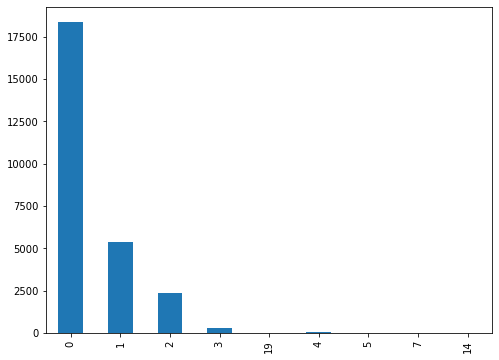

In [17]:
plt.figure(figsize=(8, 6))
train["child_num"].value_counts(sort=False).plot.bar()

In [19]:
train.loc[train['child_num'] >= 2,'child_num']=2
test.loc[test['child_num'] >= 2,'child_num']=2

#### Income_total

(-0.000745, 0.00182]    16212
(0.00182, 0.00337]       8330
(0.00337, 0.00491]       1530
(0.00491, 0.00646]        206
(0.00646, 0.00801]        121
(0.00801, 0.00956]         44
(0.00956, 0.0111]           3
(0.0111, 0.0127]            2
(0.0127, 0.0142]            4
(0.0142, 0.0158]            5
Name: income_total, dtype: int64


<AxesSubplot:ylabel='Frequency'>

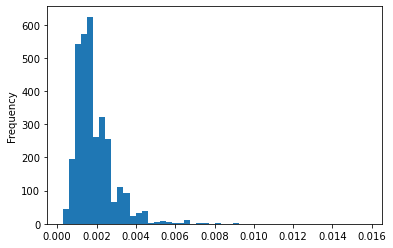

In [21]:
train["income_total"] = train["income_total"].astype(object)
train["income_total"] = train["income_total"]/10000
test['income_total'] = test['income_total']/10000

print(train["income_total"].value_counts(bins=10, sort=False))
train["income_total"].plot(kind='hist', bins=50, density=True)


In [24]:
count, bin_dividers =np.histogram(train['income_total'], bins=7)
bin_names=['소득'+str(i) for i in range(7) ]

#bin_dividers는 train기준!!

train['income_total']=pd.cut(x=train['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)
test['income_total']=pd.cut(x=test['income_total'], bins=bin_dividers, labels=bin_names, include_lowest=True)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [25]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,NaN,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21990,365243,1,0,1,0,2.0,-60.0
1,26458,0,0,1,0,NaN,State servant,Higher education,Married,House / apartment,-18964,-8671,1,0,1,0,2.0,-36.0
2,26459,0,0,1,0,NaN,Working,Secondary / secondary special,Married,House / apartment,-15887,-217,1,1,1,0,2.0,-40.0
3,26460,1,1,0,0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,-19270,-2531,1,1,0,0,2.0,-41.0
4,26461,0,1,1,0,NaN,State servant,Higher education,Married,House / apartment,-17822,-9385,1,1,0,0,2.0,-8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,NaN,Working,Incomplete higher,Married,House / apartment,-18593,-5434,1,1,1,0,2.0,-19.0
9996,36453,1,1,1,0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,-10886,-1315,1,1,0,0,2.0,-34.0
9997,36454,0,0,1,0,NaN,Working,Secondary / secondary special,Married,House / apartment,-21016,-14018,1,0,0,0,2.0,-55.0
9998,36455,0,1,0,0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,-16541,-1085,1,0,1,0,2.0,-33.0


### Type

In [23]:
print(train["income_type"].unique())
print(train["edu_type"].unique())
print(train["family_type"].unique())
print(train["house_type"].unique())

['Commercial associate' 'Working' 'State servant' 'Pensioner' 'Student']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']
['Married' 'Civil marriage' 'Separated' 'Single / not married' 'Widow']
['Municipal apartment' 'House / apartment' 'With parents'
 'Co-op apartment' 'Rented apartment' 'Office apartment']


In [26]:
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
train['income_type']=label_encoder.fit_transform(train['income_type'])
test['income_type']=label_encoder.transform(test['income_type'])
########################################################################
train['edu_type']=label_encoder.fit_transform(train['edu_type'])
test['edu_type']=label_encoder.transform(test['edu_type'])
########################################################################
train['family_type']=label_encoder.fit_transform(train['family_type'])
test['family_type']=label_encoder.transform(test['family_type'])
########################################################################
train['house_type']=label_encoder.fit_transform(train['house_type'])
test['house_type']=label_encoder.transform(test['house_type'])
########################################################################
train['income_total']=label_encoder.fit_transform(train['income_total'])
test['income_total']=label_encoder.fit_transform(test['income_total'])

In [27]:
#minus 변경하고
#구간화 함수
def make_bin(variable, n):
    train[variable]=-train[variable]
    test[variable]=-test[variable]
    count, bin_dividers =np.histogram(train[variable], bins=n) #train의 구간화를 적용
    bin_names=[str(i) for i in range(n)]
    train[variable]=pd.cut(x=train[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable]=pd.cut(x=test[variable], bins=bin_dividers, labels=bin_names, include_lowest=True)
    test[variable].fillna(str(0), inplace=True) #test에는 없는 것을 임의의 값으로 채움
    ##########################################################
    train[variable]=label_encoder.fit_transform(train[variable])
    test[variable]=label_encoder.transform(test[variable])


In [28]:
train.columns

Index(['index', 'gender', 'car', 'reality', 'child_num', 'income_total',
       'income_type', 'edu_type', 'family_type', 'house_type', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email',
       'family_size', 'begin_month', 'credit'],
      dtype='object')

In [29]:
make_bin('DAYS_BIRTH', n=10)
make_bin('DAYS_EMPLOYED', n=6)
make_bin('begin_month', n=4)

In [30]:
train

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month,credit
0,0,0,0,0,0,0,0,1,1,2,3,1,1,0,0,0,2.0,0,1.0
1,1,0,0,1,1,0,0,4,0,1,2,1,1,0,0,1,3.0,0,1.0
2,2,1,1,1,0,1,4,1,1,1,6,1,1,0,1,0,2.0,1,2.0
3,3,0,0,1,0,0,0,4,1,1,4,1,1,0,1,0,2.0,2,0.0
4,4,0,1,1,0,0,2,1,1,1,4,1,1,0,0,0,2.0,1,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,0,2,4,1,1,2,1,1,0,0,0,4.0,0,1.0
26453,26453,0,0,1,1,0,4,1,2,1,4,1,1,0,0,0,2.0,3,2.0
26454,26454,0,1,0,0,1,4,4,0,5,1,1,1,0,0,0,2.0,1,2.0
26455,26455,1,0,1,0,0,4,2,3,1,1,1,1,0,0,0,1.0,3,2.0


In [31]:
test

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,family_size,begin_month
0,26457,1,1,0,0,0,1,4,0,1,8,0,1,0,1,0,2.0,3
1,26458,0,0,1,0,0,2,1,1,1,6,1,1,0,1,0,2.0,2
2,26459,0,0,1,0,0,4,4,1,1,4,1,1,1,1,0,2.0,2
3,26460,1,1,0,0,0,0,4,1,1,6,1,1,1,0,0,2.0,2
4,26461,0,1,1,0,0,2,1,1,1,5,1,1,1,0,0,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,36452,0,1,1,0,0,4,2,1,1,6,1,1,1,1,0,2.0,1
9996,36453,1,1,1,0,0,4,4,0,1,1,1,1,1,0,0,2.0,2
9997,36454,0,0,1,0,0,4,4,1,1,7,1,1,0,0,0,2.0,3
9998,36455,0,1,0,0,0,0,4,1,1,5,1,1,0,1,0,2.0,2


In [33]:
train.shape

(26457, 19)

In [34]:
test.shape

(10000, 18)

## Data Modeling

In [91]:
train_x=train.drop('credit', axis=1)
train_y=train[['credit']]
test_x=test

In [92]:
train_x = train_x.drop('index', axis=1)

In [93]:
test_x = test_x.drop('index', axis=1)

In [94]:
print(train_x.shape, train_y.shape, test_x.shape)

(26457, 17) (26457, 1) (10000, 17)


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score
from tensorflow.keras.utils import to_categorical

X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, 
                                                    stratify=train_y, test_size=0.25,
                                                    random_state = 10086)

print("Train set: ")
print(X_train.shape)
print(y_train.shape)
print("===========")
print("Validation set: ")
print(X_val.shape)
print(y_val.shape)


clf=RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred=clf.predict_proba(X_val)

print(f"log_loss: {log_loss(to_categorical(y_val['credit']), y_pred)}")

Train set: 
(19842, 17)
(19842, 1)
Validation set: 
(6615, 17)
(6615, 1)
log_loss: 1.6055534168712673


In [122]:
from sklearn.model_selection import KFold, StratifiedKFold

def run_kfold(clf):
    folds=StratifiedKFold(n_splits=5, shuffle=True, random_state=55)
    outcomes=[]
    sub=np.zeros((test_x.shape[0], 3))  
    
    for n_fold, (train_index, val_index) in enumerate(folds.split(train_x, train_y)):
        X_train, X_val = train_x.iloc[train_index], train_x.iloc[val_index]
        y_train, y_val = train_y.iloc[train_index], train_y.iloc[val_index]
        clf.fit(X_train, y_train)
        
        predictions=clf.predict_proba(X_val)
        
        logloss=log_loss(to_categorical(y_val['credit']), predictions)
        outcomes.append(logloss)
        print(f"FOLD {n_fold} : logloss:{logloss}")
        
        sub+=clf.predict_proba(test_x)
        
        
    mean_outcome=np.mean(outcomes)
    
    print("Mean:{}".format(mean_outcome))
    return sub/folds.n_splits

my_submission = run_kfold(clf)

FOLD 0 : logloss:1.6229788065884538
FOLD 1 : logloss:1.6535875274423026
FOLD 2 : logloss:1.6165890797572644
FOLD 3 : logloss:1.5762877969852769
FOLD 4 : logloss:1.6324965002282716
Mean:1.6203879422003138


In [123]:
my_submission

array([[0.04057381, 0.10513333, 0.85429286],
       [0.00313333, 0.28140238, 0.71546429],
       [0.33100714, 0.03475079, 0.63424206],
       ...,
       [0.18564078, 0.27039889, 0.54396033],
       [0.29647302, 0.6036127 , 0.09991429],
       [0.02281443, 0.20884127, 0.7683443 ]])

In [126]:
sample_sub.loc[:,1:]=my_submission

In [128]:
sample_sub.to_csv('first_submission.csv', index=False)

# Deep Leraning

In [139]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from keras import optimizers

In [140]:
X_train, X_val, y_train, y_val = train_test_split(train_x, train_y, test_size=0.25, random_state = 10000)

In [153]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(17,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [169]:
model.fit(X_train, y_train, epochs=5)

test_loss, test_acc = model.evaluate(X_train,  y_train, verbose=2)

print('\n테스트 정확도:', test_acc)

Epoch 1/5
621/621 [==============================] - 0s 675us/step - loss: 0.0000e+00 - accuracy: 0.2355
Epoch 2/5
621/621 [==============================] - 0s 706us/step - loss: 0.0000e+00 - accuracy: 0.2355
Epoch 3/5
621/621 [==============================] - 0s 748us/step - loss: 0.0000e+00 - accuracy: 0.2355
Epoch 4/5
621/621 [==============================] - 0s 682us/step - loss: 0.0000e+00 - accuracy: 0.2355
Epoch 5/5
621/621 [==============================] - 0s 702us/step - loss: 0.0000e+00 - accuracy: 0.2355
621/621 - 0s - loss: 0.0000e+00 - accuracy: 0.2355

테스트 정확도: 0.23551052808761597


In [174]:
predictions = model.predict(X_train)

In [175]:
print(predictions)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
